 ## Insurance claims analysis

start by importing the necessary libraries for preprocessing our data

In [10]:
import pandas as pd
import numpy as np

In [11]:
raw_data =  pd.read_csv("Set.csv")

I always make a copy of the original data incase I make a mistake while preprocessing I my be able to call the raw_data that is still clean 

In [12]:
df =  raw_data.copy()

just get an idea of how my dataset is shaped

In [13]:
df.shape

(1338, 15)

eyeball the head columns of the data

In [14]:
df.head()

,Unnamed: 0,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount,age_group,parental_status,fitness_level,weight_groups,fitness_group
0,0,36,female,29.9,8007,0,no,southeast,yes,4889.04,adults,None Parent,Somewhat Active,Over Weight,Somewhat Active
1,1,38,female,40.2,4008,0,no,southeast,yes,5400.98,adults,None Parent,Sedntary Lifestyle,Very Obese,None Active
2,2,41,male,40.3,3001,0,no,southeast,yes,5709.16,adults,None Parent,Sedntary Lifestyle,Very Obese,None Active
3,3,40,male,41.7,4007,0,no,southeast,yes,5438.75,adults,None Parent,Sedntary Lifestyle,Very Obese,None Active
4,4,39,female,41.8,3008,0,no,southeast,yes,5662.23,adults,None Parent,Sedntary Lifestyle,Very Obese,None Active


In [15]:
df = df.drop(['Unnamed: 0'], axis=1)

Get statistics descriptions of the data

In [16]:
df.describe()

,age,bmi,steps,children,claim_amount
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,5328.623318,1.094918,9611.312347
std,14.049960,6.098382,2453.643236,1.205493,13450.624556
min,18.000000,16.000000,3000.000000,0.000000,0.000000
25%,27.000000,26.300000,3008.000000,0.000000,0.000000
50%,39.000000,30.400000,4007.000000,1.000000,2748.485000
75%,51.000000,34.700000,8004.000000,2.000000,13045.977500
max,64.000000,53.100000,10010.000000,5.000000,63770.430000


now I convert insurance_claim values from categorical to bin variables that we will use for our classisfication model

In [ ]:
raw_data['insurance_claim'] = raw_data['insurance_claim'].map({'yes': 1, 'no': 0})

In [17]:
df['insurance_claim'] = df['insurance_claim'].map({'yes': 1, 'no': 0})

In [81]:
df.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount,age_group,parental_status,fitness_level,weight_groups,fitness_group
0,36,female,29.9,8007,0,no,southeast,1,4889.04,adults,None Parent,Somewhat Active,Over Weight,Somewhat Active
1,38,female,40.2,4008,0,no,southeast,1,5400.98,adults,None Parent,Sedntary Lifestyle,Very Obese,None Active
2,41,male,40.3,3001,0,no,southeast,1,5709.16,adults,None Parent,Sedntary Lifestyle,Very Obese,None Active
3,40,male,41.7,4007,0,no,southeast,1,5438.75,adults,None Parent,Sedntary Lifestyle,Very Obese,None Active
4,39,female,41.8,3008,0,no,southeast,1,5662.23,adults,None Parent,Sedntary Lifestyle,Very Obese,None Active


get dummy variables 

In [18]:
df = pd.get_dummies(df, drop_first=True)

In [19]:
df.head()

,age,bmi,steps,children,insurance_claim,claim_amount,sex_male,smoker_yes,region_northwest,region_southeast,...,fitness_level_Low Active,fitness_level_Sedntary Lifestyle,fitness_level_Somewhat Active,weight_groups_Obese,weight_groups_Over Weight,weight_groups_Under Weight,weight_groups_Very Obese,fitness_group_Low Active,fitness_group_None Active,fitness_group_Somewhat Active
0,36,29.9,8007,0,1,4889.04,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,38,40.2,4008,0,1,5400.98,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2,41,40.3,3001,0,1,5709.16,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
3,40,41.7,4007,0,1,5438.75,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
4,39,41.8,3008,0,1,5662.23,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0


re-arrange the columns

In [84]:
df.columns

Index(['age', 'bmi', 'steps', 'children', 'insurance_claim', 'claim_amount',
       'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_group_adults', 'age_group_seniors',
       'age_group_teen', 'age_group_young adults', 'parental_status_Parent',
       'fitness_level_Low Active', 'fitness_level_Sedntary Lifestyle',
       'fitness_level_Somewhat Active', 'weight_groups_Obese',
       'weight_groups_Over Weight', 'weight_groups_Under Weight',
       'weight_groups_Very Obese', 'fitness_group_Low Active',
       'fitness_group_None Active', 'fitness_group_Somewhat Active'],
      dtype='object')

In [12]:
df = df[['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest','age', 'bmi', 'steps',
        'children', 'claim_amount', 'insurance_claim']]

In [13]:
df.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,steps,children,claim_amount,insurance_claim
0,1,0,0,1,0,0,0,1,19,27.900,3009,0,16884.9240,1
1,0,1,1,0,0,0,1,0,18,33.770,3008,1,1725.5523,1
2,0,1,1,0,0,0,1,0,28,33.000,3009,3,0.0000,0
3,0,1,1,0,0,1,0,0,33,22.705,10009,0,0.0000,0
4,0,1,1,0,0,1,0,0,32,28.880,8010,0,3866.8552,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 26 columns):
age                                 1338 non-null int64
bmi                                 1338 non-null float64
steps                               1338 non-null int64
children                            1338 non-null int64
insurance_claim                     1338 non-null int64
claim_amount                        1338 non-null float64
sex_male                            1338 non-null uint8
smoker_yes                          1338 non-null uint8
region_northwest                    1338 non-null uint8
region_southeast                    1338 non-null uint8
region_southwest                    1338 non-null uint8
age_group_adults                    1338 non-null uint8
age_group_seniors                   1338 non-null uint8
age_group_teen                      1338 non-null uint8
age_group_young adults              1338 non-null uint8
parental_status_Parent              1338 non-null

# create target variables

In [20]:
#targets 
y =  df['insurance_claim']

#features 
X = df.drop(['insurance_claim','claim_amount'], axis=1)

## scale some columns

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.array(np.mean(X[self.columns]))
        self.var_ = np.array(np.var(X[self.columns]))
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]
    

select the numerical column as the columns to scale

In [22]:
columns_to_scale = ['age','children', 'bmi', 'steps']

In [23]:
scaler = CustomScaler(columns_to_scale)

In [24]:
scaler

CustomScaler(columns=['age', 'children', 'bmi', 'steps'], copy=None,
       with_mean=None, with_std=None)

In [25]:
scaler.fit(X)

C:\Users\student-cpt-321\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


CustomScaler(columns=['age', 'children', 'bmi', 'steps'], copy=None,
       with_mean=None, with_std=None)

In [26]:
X = scaler.transform(X)

C:\Users\student-cpt-321\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [27]:
X.head()

,age,bmi,steps,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_adults,...,fitness_level_Low Active,fitness_level_Sedntary Lifestyle,fitness_level_Somewhat Active,weight_groups_Obese,weight_groups_Over Weight,weight_groups_Under Weight,weight_groups_Very Obese,fitness_group_Low Active,fitness_group_None Active,fitness_group_Somewhat Active
0,-0.228344,-0.125567,1.092000,-0.908614,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,-0.085942,1.564037,-0.538431,-0.908614,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
2,0.127662,1.580441,-0.948994,-0.908614,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,0.056461,1.810096,-0.538839,-0.908614,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
4,-0.014740,1.826500,-0.946140,-0.908614,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0


# split the data to train and test data I will use 80:20 model

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Train the model

In [29]:
from sklearn.linear_model import LogisticRegression 

creating the model instance

In [30]:
model  = LogisticRegression()

train the model

In [31]:
model.fit(X_train,y_train)

C:\Users\student-cpt-321\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Extracting parameters from the model

In [32]:
#train accuracy can't be used to conclude on model accuracy bu I just want to check how well it predicts during training
model.score(X_test,y_test)

0.8955223880597015

In [33]:
model.intercept_

array([-0.05342405])

In [34]:
model.coef_

array([[ 0.64488755,  1.49249412,  0.18749961, -0.93537184, -0.10179644,
         4.14662267, -0.48015783, -0.36322934, -0.32001608,  0.14420463,
        -0.56298664,  0.16144147, -0.89212725, -1.96237009, -0.41794073,
         0.14050181,  0.36509758,  1.85394456,  1.46770993,  2.48755474,
         0.42677642, -0.41794073,  0.14050181,  0.36509758]])

I will create a summary table wich will help us weigh the features impacts

In [35]:
X.columns

Index(['age', 'bmi', 'steps', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'age_group_adults', 'age_group_seniors', 'age_group_teen',
       'age_group_young adults', 'parental_status_Parent',
       'fitness_level_Low Active', 'fitness_level_Sedntary Lifestyle',
       'fitness_level_Somewhat Active', 'weight_groups_Obese',
       'weight_groups_Over Weight', 'weight_groups_Under Weight',
       'weight_groups_Very Obese', 'fitness_group_Low Active',
       'fitness_group_None Active', 'fitness_group_Somewhat Active'],
      dtype='object')

In [36]:
# we will append this list on the on the summary table it will contain all features used for prediction 
features = ['age', 'bmi', 'steps', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'age_group_adults', 'age_group_seniors', 'age_group_teen',
       'age_group_young adults', 'parental_status_Parent',
       'fitness_level_Low Active', 'fitness_level_Sedntary Lifestyle',
       'fitness_level_Somewhat Active', 'weight_groups_Obese',
       'weight_groups_Over Weight', 'weight_groups_Under Weight',
       'weight_groups_Very Obese', 'fitness_group_Low Active',
       'fitness_group_None Active', 'fitness_group_Somewhat Active']
#now I create a DataFrame which contains the featues
summary_table = pd.DataFrame(columns = ['Features'], data=features)
#at this stage we just add more columns with statistical summary
summary_table['Coefffient'] = np.transpose(model.coef_)

In [37]:
summary_table

,Features,Coefffient
0,age,0.644888
1,bmi,1.492494
2,steps,0.187500
3,children,-0.935372
4,sex_male,-0.101796
5,smoker_yes,4.146623
6,region_northwest,-0.480158
7,region_southeast,-0.363229
8,region_southwest,-0.320016
9,age_group_adults,0.144205


create 1 extra row where I will pu the intercept

In [38]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Features,Coefffient
0,Intercept,-0.053424
1,age,0.644888
2,bmi,1.492494
3,steps,0.187500
4,children,-0.935372
5,sex_male,-0.101796
6,smoker_yes,4.146623
7,region_northwest,-0.480158
8,region_southeast,-0.363229
9,region_southwest,-0.320016


adding the log(odds) column on to the table

In [39]:
summary_table['Odds_ratio'] = np.exp(summary_table['Coefffient'])
summary_table

,Features,Coefffient,Odds_ratio
0,Intercept,-0.053424,0.947978
1,age,0.644888,1.905773
2,bmi,1.492494,4.448176
3,steps,0.187500,1.206230
4,children,-0.935372,0.392440
5,sex_male,-0.101796,0.903213
6,smoker_yes,4.146623,63.220124
7,region_northwest,-0.480158,0.618686
8,region_southeast,-0.363229,0.695427
9,region_southwest,-0.320016,0.726137


In [40]:
summary_table.sort_values('Odds_ratio', ascending=False)

,Features,Coefffient,Odds_ratio
6,smoker_yes,4.146623,63.220124
20,weight_groups_Under Weight,2.487555,12.031819
18,weight_groups_Obese,1.853945,6.384956
2,bmi,1.492494,4.448176
19,weight_groups_Over Weight,1.467710,4.339286
1,age,0.644888,1.905773
21,weight_groups_Very Obese,0.426776,1.532310
24,fitness_group_Somewhat Active,0.365098,1.440655
17,fitness_level_Somewhat Active,0.365098,1.440655
3,steps,0.187500,1.206230


In [41]:
summary_table.to_csv('summary_table.csv')

# confusion matrix

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
y_pred =  model.predict(X_test)

In [44]:
confusion_matrix(y_test,y_pred)

array([[ 87,  13],
       [ 15, 153]], dtype=int64)

# Test the Model

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       100
           1       0.92      0.91      0.92       168

   micro avg       0.90      0.90      0.90       268
   macro avg       0.89      0.89      0.89       268
weighted avg       0.90      0.90      0.90       268



In [ ]:
modelscore()

# save the model

In [47]:
import pickle

In [48]:
with open('model','wb') as file:
    pickle.dump(model,file)

In [49]:
with open('scaler','wb') as file:
    pickle.dump(scaler,file)

# Data Visualisation

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [51]:
raw_data = raw_data.drop('Unnamed: 0', axis=1)

In [52]:
raw_data.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount,age_group,parental_status,fitness_level,weight_groups,fitness_group
0,36,female,29.9,8007,0,no,southeast,yes,4889.04,adults,None Parent,Somewhat Active,Over Weight,Somewhat Active
1,38,female,40.2,4008,0,no,southeast,yes,5400.98,adults,None Parent,Sedntary Lifestyle,Very Obese,None Active
2,41,male,40.3,3001,0,no,southeast,yes,5709.16,adults,None Parent,Sedntary Lifestyle,Very Obese,None Active
3,40,male,41.7,4007,0,no,southeast,yes,5438.75,adults,None Parent,Sedntary Lifestyle,Very Obese,None Active
4,39,female,41.8,3008,0,no,southeast,yes,5662.23,adults,None Parent,Sedntary Lifestyle,Very Obese,None Active


In [53]:
raw_data['fitness_level'] = raw_data['fitness_level'].map({'Somewhat Active': "SM_Active", 'Sedentary Lifestyle': ""})

Text(0.5, 1.0, 'Age on Claims')

<Figure size 1152x432 with 0 Axes>

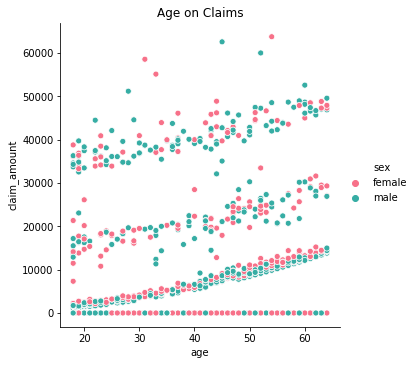

In [54]:
plt.figure(figsize=(16, 6))
sns.relplot(x='age', y='claim_amount', hue= 'sex', data=raw_data, palette='husl')
plt.title('Age on Claims')

Text(0.5, 1.0, 'Age and Smoking on Claims')

<Figure size 1152x576 with 0 Axes>

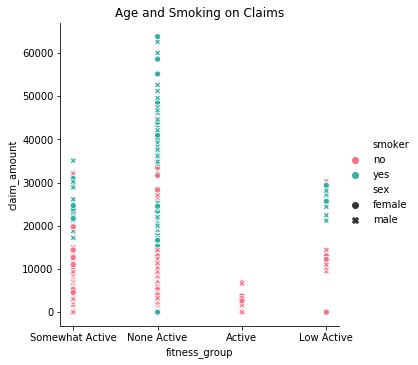

In [55]:
plt.figure(figsize=(16, 8))
sns.relplot(x='fitness_group', y='claim_amount', hue='smoker', style= 'sex', data=raw_data, palette='husl')
plt.title('Age and Smoking on Claims')

Text(0.5, 1.0, 'Claims Distribution')

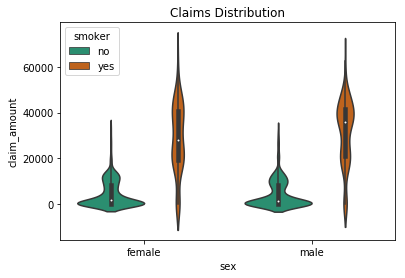

In [58]:
sns.violinplot(x="sex", y='claim_amount', hue="smoker", data=raw_data, palette='Dark2')
plt.title('Claims Distribution')


In [61]:
data_grouped=raw_data.groupby(['smoker', 'sex']).agg({'claim_amount':'sum','sex':'count'})
data_grouped['mean_claims']= data_grouped['claim_amount']/data_grouped['sex']
data_grouped=data_grouped.rename(columns={'sex':'number_in_gender'})
data_grouped.index=[0,1,2,3]
data_grouped['smoker']=['no','no','yes','yes']
data_grouped['sex']=['female','male','female','male']
data_grouped=data_grouped[['smoker', 'sex','number_in_gender','claim_amount','mean_claims']]
data_grouped.to_csv('grouped.csv')

Text(0.5, 1.0, 'Average Claims ')

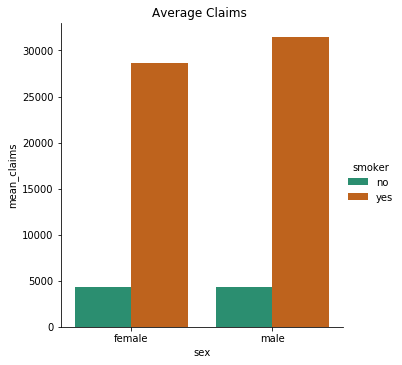

In [63]:
sns.catplot(x='sex',y='mean_claims',hue='smoker',kind='bar',data=data_grouped, palette='Dark2')
plt.title('Average Claims ')

Text(0.5, 1.0, 'Age Distribution by Smoker')

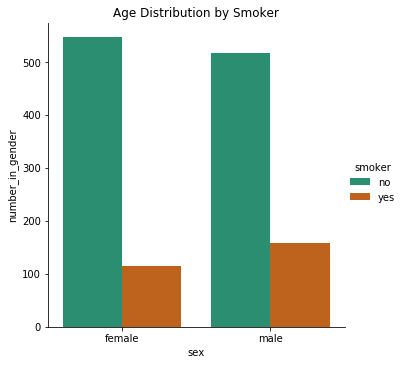

In [64]:
sns.catplot(x='sex',y='number_in_gender',hue='smoker',kind='bar',data=data_grouped, palette='Dark2')
plt.title('Age Distribution by Smoker')

Text(0.5, 1.0, 'Effect of BMI on Claims')

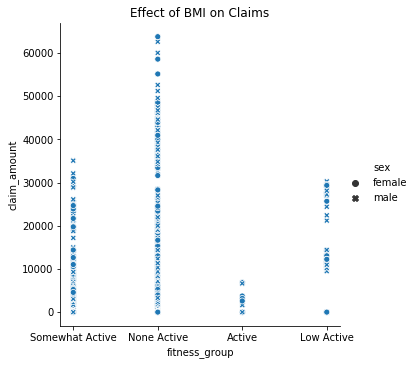

In [166]:
sns.relplot(x='fitness_group',y='claim_amount',style='sex',data=raw_data)
plt.title('Effect of BMI on Claims')

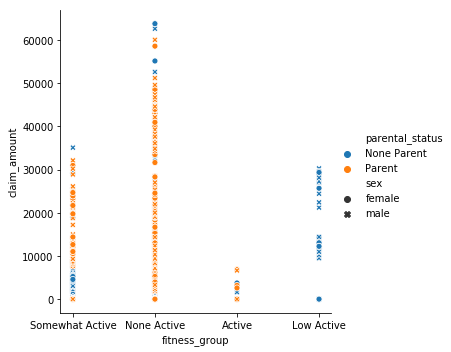

In [167]:
sns.relplot(x='fitness_group',y='claim_amount',hue='parental_status',style='sex',data=raw_data)

C:\Users\student-cpt-321\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


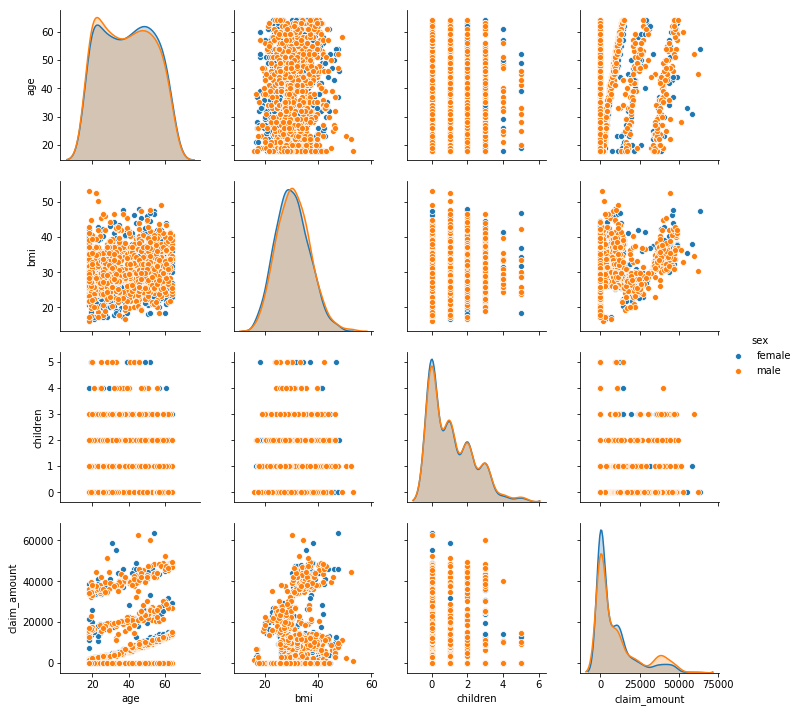

In [144]:
sns.pairplot(raw_data, vars= ['age','bmi','children','claim_amount'], hue='sex')

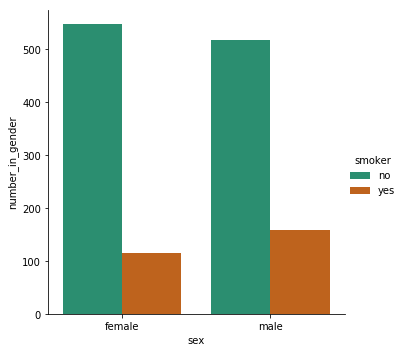

In [135]:
sns.catplot(x='sex',y='number_in_gender',hue='smoker',kind='bar',data=data_grouped, palette='Dark2')